Build and demonstrate an autoencoder network using neural layers for data compression on image dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.4438 - val_loss: 0.3123
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3060 - val_loss: 0.3006
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2954 - val_loss: 0.2938
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2905 - val_loss: 0.2902
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2870 - val_loss: 0.2894
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2841 - val_loss: 0.2848
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2827 - val_loss: 0.2835
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.2805 - val_loss: 0.2815
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2786 - val_loss: 0.2803
Epoch 10/50
235/235 ━━━━━━━━━

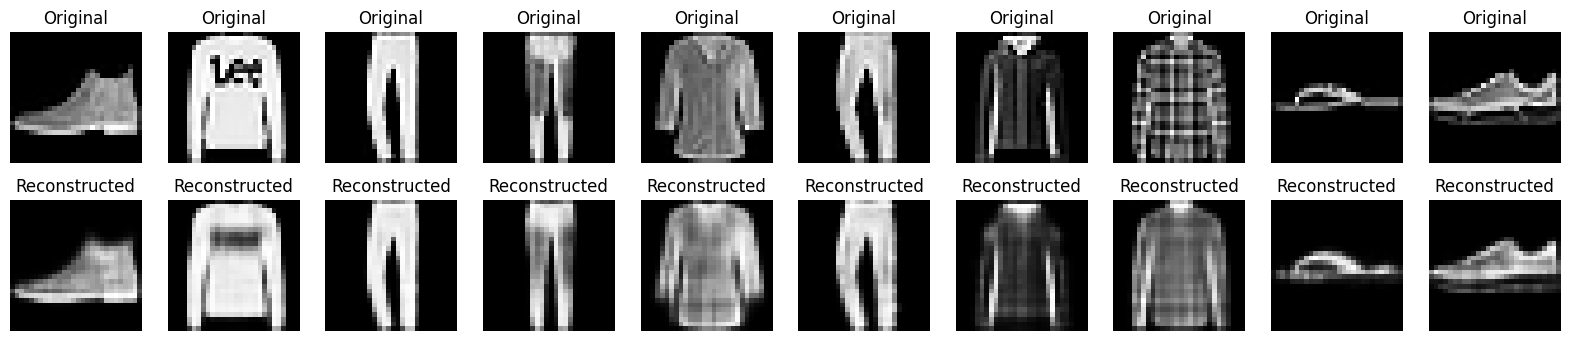

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to vectors
x_train_flat = x_train.reshape((len(x_train), 28 * 28))
x_test_flat = x_test.reshape((len(x_test), 28 * 28))

# Autoencoder architecture parameters
input_dim = 28 * 28
encoding_dim = 64

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model for compressed output
encoder = Model(input_img, encoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

# Encode and decode test images
encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = autoencoder.predict(x_test_flat)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
